
**Workflow**

1.   Mounting Google Drive: This block mounts Google Drive to access the dataset stored there.


2.   Fetching Directories: Fetches directories for the train, test, and validation datasets.

3. Fetching Data: Loads data from the train, test, and validation directories.

4. Data Inspection: Displays sample images from the dataset to ensure successful access.

5. Data Augmentation: Augments the dataset to increase its size, rescales images, and sets batch size to 10. Shuffle is set to false for consistency in training. Class mode is set to binary for binary classification.

6. Importing Pre-trained Model: Imports the VGG16 pre-trained model.

7. Freezing Layers: Freezes the weights of the pre-trained VGG16 layers.

8. Modifying Last Layer: Modifies the last layer of the VGG16 model for binary classification.

9. Model Summary: Displays a summary of the modified VGG16 model architecture.

10. Training with Callbacks: Trains the model using callbacks for early stopping and saving the best model based on improved accuracy.

11. Saving Model: Saves the trained model.

12. Prediction: Uses the trained model to predict whether an image contains ASD or non-ASD.

13. Training without Early Stopping: Trains the model without early stopping.

14. Saving Model: Saves the trained model without early stopping.

15. Plotting Model Loss: Plots the loss curve during model training.

16. Plotting Model Accuracy: Plots the accuracy curve during model training.

17. Calculating Precision, Recall, and F1 Score: Computes precision, recall, and F1 score metrics for model evaluation.

18. Confusion Matrix (Test Set): Generates a confusion matrix for the test dataset.

19. Misclassification Analysis (Test Images): Analyzes misclassified images from the test dataset.

20. Confusion Matrix (Train Set): Generates a confusion matrix for the train dataset.

21. Misclassification Analysis (Train Images): Analyzes misclassified images from the train dataset.

22. Confusion Matrix (Validation Set): Generates a confusion matrix for the validation dataset.

23. Misclassification Analysis (Validation Images): Analyzes misclassified images from the validation dataset.



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import time
import os
from PIL import Image
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import zipfile
import os
from google.colab import files


import logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

In [ ]:
# Upload dataset from local machine
uploaded = files.upload()

# Extract the uploaded zip file
zip_file = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Verify extraction
os.listdir('dataset')


In [ ]:
# Upload dataset from local machine
uploaded = files.upload()

# Extract the uploaded zip file
zip_file = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Verify extraction
os.listdir('dataset')


Saving test_ASD_DATA.zip to test_ASD_DATA.zip


['train', 'test']

In [ ]:
# Upload dataset from local machine
uploaded = files.upload()

# Extract the uploaded zip file
zip_file = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Verify extraction
os.listdir('dataset')


Saving valid_ASD_DATA.zip to valid_ASD_DATA.zip


['valid', 'train', 'test']

In [ ]:
train_asd_dir = '/content/dataset/train_ASD_DATA/train/Autistic'
train_nasd_dir ='/content/dataset/train_ASD_DATA/train/Non_Autistic'
validation_asd_dir ='/content/dataset/valid/Autistic'
validation_nasd_dir ='/content/dataset/valid/Non_Autistic'
test_asd_dir = '/content/dataset/test/Autistic'
test_nasd_dir = '/content/dataset/test/Non_Autistic'

Showing some fetched data



In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_asd_fnames = os.listdir( train_asd_dir )
train_nasd_fnames = os.listdir( train_nasd_dir )


next_asd_pix = [os.path.join(train_asd_dir, fname)
                for fname in train_asd_fnames[ pic_index-8:pic_index]
               ]

next_nasd_pix = [os.path.join(train_nasd_dir, fname)
                for fname in train_nasd_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_asd_pix+next_nasd_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from tensorflow.keras.optimizers import Adam

# Recompile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Data Augmentation to make more photos



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('/content/dataset/train_ASD_DATA/train',
                                             target_size=(224,224),
                                             batch_size=16,
                                             class_mode='binary')
#Validation Set
valid_set = valid_datagen.flow_from_directory('/content/dataset/valid',
                                           target_size=(224,224),
                                           batch_size = 16,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set
test_set = test_datagen.flow_from_directory('/content/dataset/test',
                                            target_size=(224,224),
                                            batch_size = 16,
                                            class_mode='binary',
                                            shuffle=False)



Found 2526 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


Pretrained Resnet 50 Model Importing



In [ ]:
from tensorflow.keras.applications import ResNet50
# from keras.applications.resnet50 import ResNet50

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights=None)

Basic Resnet50 Weight Not updated



In [ ]:
#To set the layers to non-trainable (weights will not be updated)
for layer in base_model.layers:
    layer.trainable = True

Last layer changed as per below



In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5"
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

#RMS optimizer
#model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

#adam optimizer
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 74,968,961 (285.98 MB)

 Trainable params: 74,915,841 (285.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
! pip install git+https://github.com/qubvel/classification_models.git


  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-nbgcvkwi
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/classification_models.git /tmp/pip-req-build-nbgcvkwi
  Resolved https://github.com/qubvel/classification_models.git to commit a0f006e05485a34ccf871c421279864b0ccd220b
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.3 MB/s eta 0:00:00
  Created wheel for image_classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20030 sha256=5c61ecff00aedc266d1d8c7cfcc6204a164b012e00981d97cebdd264a340bafa
  Stored in directory: /tmp/pip-ephem-wheel-cache-jpjlayhh/wheels/f5/13/cb/b1dbd79043c5a389742e422859b0b663adcd7b5c220928c339
Successfully built image_classifiers


In [ ]:
from tensorflow.keras import layers
import tensorflow as tf
from classification_models.keras import Classifiers
from keras.callbacks import ModelCheckpoint, EarlyStopping
import time

# Load ResNet-50 model
ResNet50, preprocess_input = Classifiers.get('resnet50')

# Define the model
base_model = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(inputs=[base_model.input], outputs=[output])

# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=10),
#     ModelCheckpoint(filepath='/content/gdrive/MyDrive/DNN Keras Models/resnet50_imagenet_adam.h5', save_best_only=True)
# ]
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='/content/gdrive/MyDrive/DNN Keras Models/resnet50_imagenet_sgd.keras', save_best_only=True)
]
# Number of epochs
epochs = 100

# Start time
start_time = time.time()

# Train the model
inc_best = model.fit(train_set, validation_data=valid_set, epochs=epochs, verbose=1, callbacks=callbacks)

# End time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
hours = training_time // 3600
minutes = (training_time % 3600) // 60
seconds = training_time % 60

# Print training time
print(f"Training completed in: {int(hours):0>2}:{int(minutes):0>2}:{seconds:05.2f}")
print(f"Total training time in seconds: {training_time:.2f}")

# To discover the training epoch on which training was stopped
final_epoch = len(inc_best.history['loss'])
print(f"Training stopped at epoch: {final_epoch}")


94592056/94592056 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


158/158 ━━━━━━━━━━━━━━━━━━━━ 114s 400ms/step - accuracy: 0.6950 - loss: 0.5697 - val_accuracy: 0.5000 - val_loss: 0.7643
Epoch 2/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 39s 239ms/step - accuracy: 0.8472 - loss: 0.3721 - val_accuracy: 0.5000 - val_loss: 1.0433
Epoch 3/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 38s 232ms/step - accuracy: 0.8691 - loss: 0.2976 - val_accuracy: 0.5000 - val_loss: 2.1256
Epoch 4/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 42s 239ms/step - accuracy: 0.9162 - loss: 0.2165 - val_accuracy: 0.7250 - val_loss: 0.5515
Epoch 5/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 41s 239ms/step - accuracy: 0.9421 - loss: 0.1509 - val_accuracy: 0.8375 - val_loss: 0.3956
Epoch 6/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 41s 234ms/step - accuracy: 0.9306 - loss: 0.1725 - val_accuracy: 0.8750 - val_loss: 0.3838
Epoch 7/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 39s 235ms/step - accuracy: 0.9495 - loss: 0.1245 - val_accuracy: 0.9375 - val_loss: 0.1521
Epoch 8/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 40s 235ms/step - accuracy: 0.9582 - loss: 0.10

In [ ]:

model.save('/content/dataset/Model/resnet50_best.keras')


In [ ]:
#model for plotting
inception = model.fit(train_set, validation_data = valid_set, steps_per_epoch = 100, epochs = 100)


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 243ms/step - accuracy: 0.9905 - loss: 0.0261 - val_accuracy: 0.9625 - val_loss: 0.1461
Epoch 2/100
 58/100 ━━━━━━━━━━━━━━━━━━━━ 9s 224ms/step - accuracy: 0.9945 - loss: 0.0192

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9909 - loss: 0.0260 - val_accuracy: 0.9750 - val_loss: 0.0565
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 242ms/step - accuracy: 0.9848 - loss: 0.0362 - val_accuracy: 0.9625 - val_loss: 0.1645
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.9981 - loss: 0.0127 - val_accuracy: 0.9625 - val_loss: 0.0710
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 239ms/step - accuracy: 0.9926 - loss: 0.0184 - val_accuracy: 0.9750 - val_loss: 0.1017
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.9965 - loss: 0.0159 - val_accuracy: 0.9750 - val_loss: 0.0342
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 239ms/step - accuracy: 0.9889 - loss: 0.0296 - val_accuracy: 0.9625 - val_loss: 0.0761
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.9961 - loss: 0.0167 - val_accuracy: 0.9625 - val_loss: 0.1031
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 243ms/step - accuracy: 0.9894 - loss: 0.038

In [ ]:
model.save('/content/dataset/Model/resnet50_100.keras')


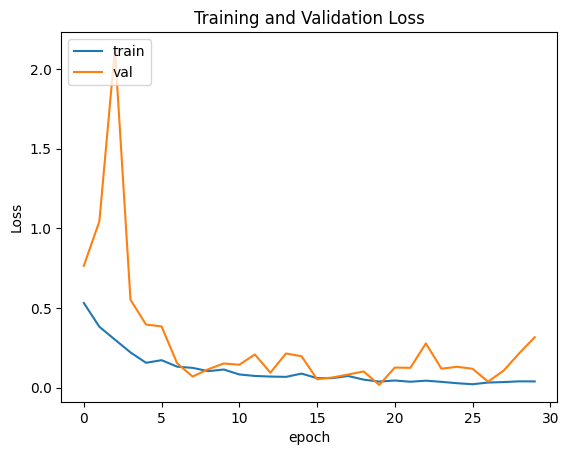

In [ ]:
import keras
from matplotlib import pyplot as plt


plt.plot(inc_best.history['loss'])
plt.plot(inc_best.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

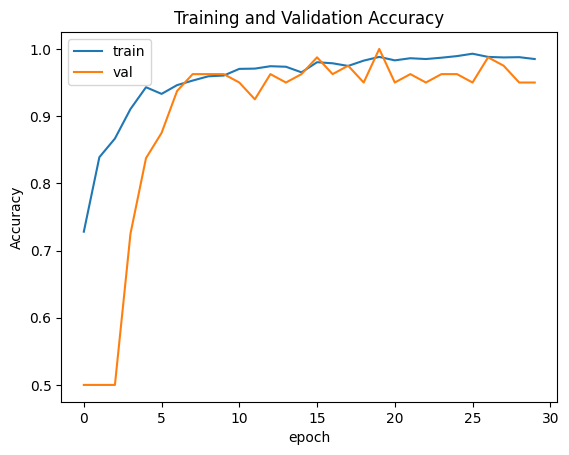

In [ ]:
import keras
from matplotlib import pyplot as plt


plt.plot(inc_best.history['accuracy'])
plt.plot(inc_best.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/dataset/Model/resnet50_100.keras')


In [ ]:

model.save('/content/gdrive/MyDrive/resnet50_best.keras')

Model Loss Plotting



In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, verbose=1)
print(f"Test accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.9798 - loss: 0.0989
Test accuracy: 0.9714


In [ ]:

import keras
from matplotlib import pyplot as plt


plt.plot(inc_best.history['loss'])
plt.plot(inc_best.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


AttributeError: 'Functional' object has no attribute 'history'

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

NameError: name 'history' is not defined

<Figure size 1000x600 with 0 Axes>

Model Accuracy Plotting



In [ ]:

import keras
from matplotlib import pyplot as plt


plt.plot(inc_best.history['accuracy'])
plt.plot(inc_best.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_set, verbose=1)
print(f"Test accuracy: {test_accuracy:.4f}")

NameError: name 'test_set' is not defined

In [ ]:
import pandas as pd
test_set.reset
ytesthat = model.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

AttributeError: 'Functional' object has no attribute 'predict_generator'

In [ ]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

AttributeError: 'DataFrame' object has no attribute 'y'

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Reset the test set (if needed)
test_set.reset()

# Measure inference time
start_inference_time = time.time()
ytesthat = model.predict(test_set)
end_inference_time = time.time()
inference_time = end_inference_time - start_inference_time

print(f"Inference time: {inference_time:.2f} seconds")

# Create a DataFrame to store the results
df = pd.DataFrame({
    'filename': test_set.filenames,
    'predict_prob': ytesthat[:, 0],
    'true_label': test_set.classes
})

# Convert the predicted probabilities to binary predictions
df['predict_binary'] = (df['predict_prob'] > 0.5).astype(int)

# Convert numeric labels to string labels
df['true_label_str'] = df['true_label'].map({0: 'Non-Autistic', 1: 'Autistic'})
df['predict_label_str'] = df['predict_binary'].map({0: 'Non-Autistic', 1: 'Autistic'})

# Calculate metrics
accuracy = accuracy_score(df['true_label'], df['predict_binary'])
precision = precision_score(df['true_label'], df['predict_binary'])
recall = recall_score(df['true_label'], df['predict_binary'])
f1 = f1_score(df['true_label'], df['predict_binary'])

# Print the metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step
Inference time: 51.11 seconds
Test Accuracy: 0.9714
Precision: 0.9783
Recall: 0.9643
F1 Score: 0.9712


In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [ ]:

misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 280 Testing images : %d'%misclassified['y'].count())


Total misclassified image from 280 Testing images : 13


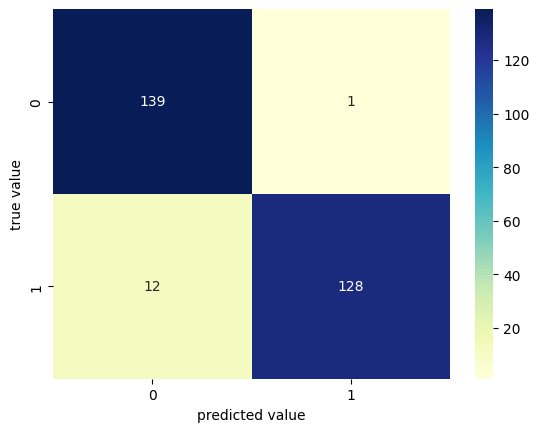

In [ ]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
# Assuming test_set is your test dataset and ytesthat contains the predicted labels
# Ensure these variables are defined in your environment
# Example:
# test_set = ... (your test dataset)
# ytesthat = ... (your predicted labels)

# Create the DataFrame
df = pd.DataFrame({
    'filename': test_set.filenames,  # Assuming test_set has a 'filenames' attribute
    'predict': ytesthat[:, 0],       # Assuming ytesthat is a 2D array with predictions
    'y': test_set.classes            # Assuming test_set has a 'classes' attribute
})

# Display unique values in true labels and predicted labels
print(df['y'].unique())
print(df['predict'].unique())

[0 1]
[1.76855307e-02 1.59053819e-03 2.23530463e-07 2.61353557e-06
 1.18825780e-02 3.95856205e-06 5.31395199e-04 3.42899126e-10
 4.12427607e-06 1.48417648e-05 9.95117500e-09 3.89279097e-01
 1.75733396e-06 2.49461459e-06 1.32349565e-09 4.46870799e-05
 2.00723971e-05 2.03816802e-03 2.57295994e-07 4.30606523e-10
 3.35343134e-06 3.94637871e-04 9.70620822e-05 4.47422608e-05
 1.42666686e-03 1.95919329e-05 1.64987741e-05 8.29632245e-06
 4.61953562e-07 4.47453878e-08 3.59209156e-14 1.04630897e-06
 1.76419489e-05 9.95657032e-08 1.16866053e-04 1.37901853e-03
 2.51663395e-11 1.89197302e-09 2.77261715e-04 2.01370582e-04
 1.73915287e-05 4.18021670e-03 1.68886513e-01 2.56015737e-05
 3.87804866e-05 2.63360071e-05 1.57459235e-05 3.35564209e-06
 4.17471025e-03 1.09136276e-01 9.42263512e-07 5.72045478e-09
 3.59888341e-09 1.93128145e-08 6.28031994e-05 3.57391770e-07
 1.18750587e-09 2.57446209e-06 4.48940322e-03 3.35394579e-05
 6.87557331e-05 4.76509321e-08 3.03107900e-05 3.17548254e-09
 6.21299540e-11 8.

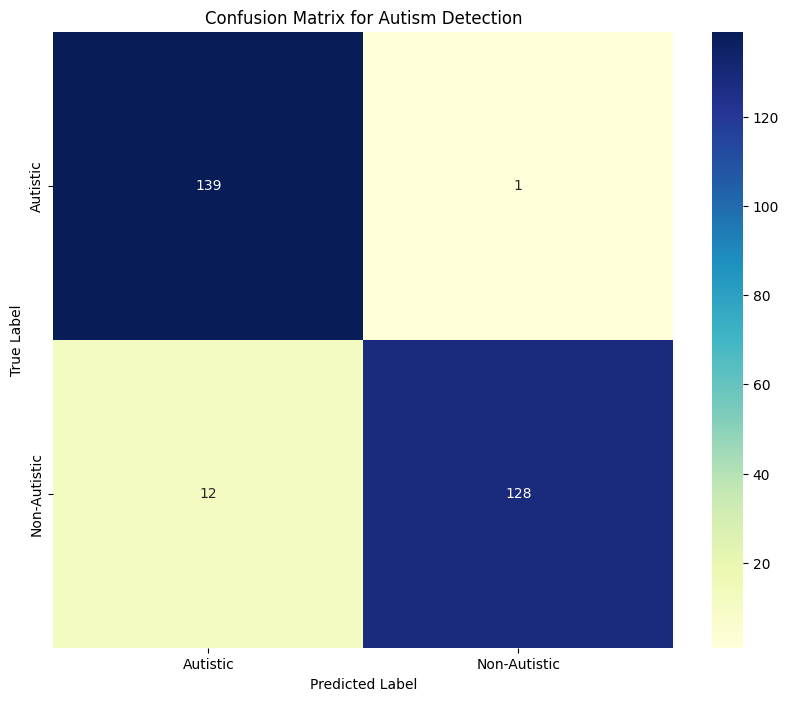

In [ ]:
# Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_matrix = confusion_matrix(df.y, df.y_pred)

# Define the labels
# labels = ['Autistic', 'Non-Autistic']

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Autism Detection')

# Show the plot
plt.show()

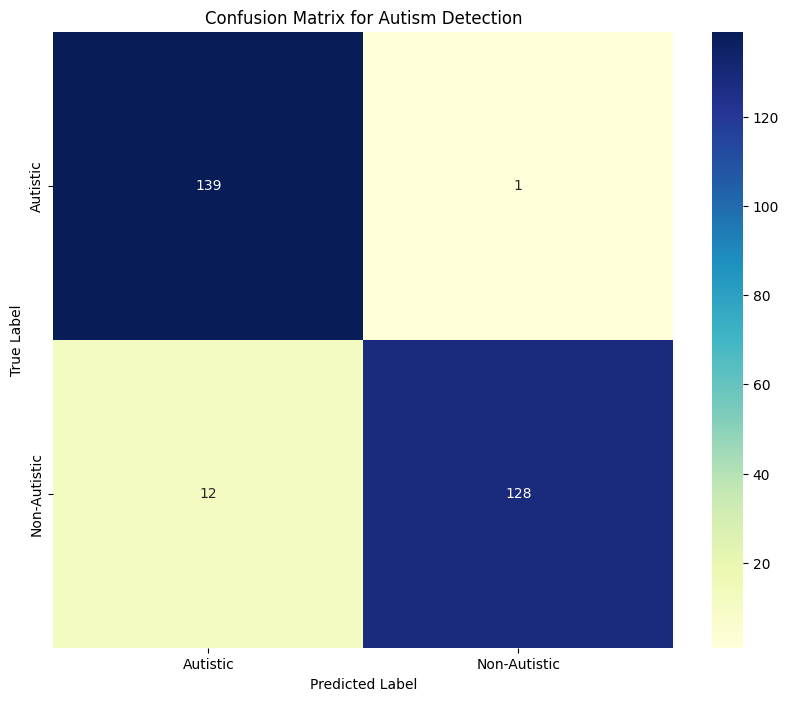

In [ ]:
# Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_matrix = confusion_matrix(df.y, df.y_pred)

# Define the labels
labels = ['Autistic', 'Non-Autistic']

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Autism Detection')

# Show the plot
plt.show()

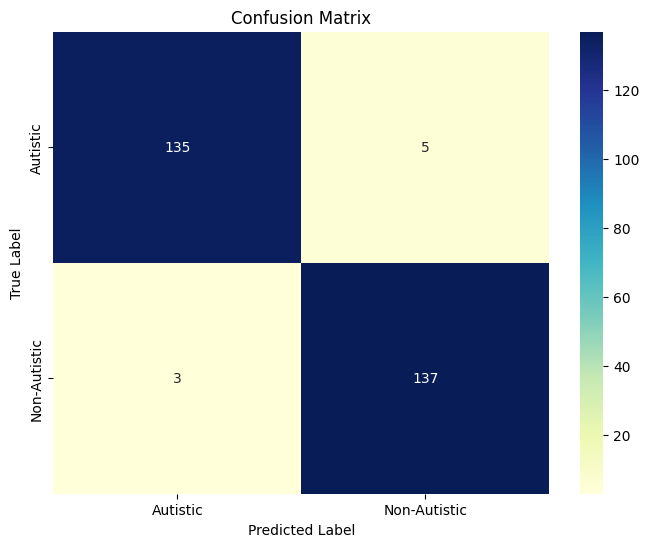

In [ ]:


# Confusion Matrix
cm = confusion_matrix(df['true_label_str'], df['predict_label_str'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Autistic', 'Non-Autistic'], yticklabels=['Autistic', 'Non-Autistic'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df.y contains the true labels and df.y_pred contains the predicted labels
conf_matrix = confusion_matrix(df.y, df.y_pred)

# Define the labels for the axes
labels = ['Non-Autistic', 'Autistic']

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, cmap="YlGnBu", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'y'

Precision, Recall, F1 score, inference time

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming you have your true_labels and predicted_labels
df = pd.DataFrame({'true_label': true_labels, 'predicted_label': predicted_labels})

# Create a contingency table
contingency_table = pd.crosstab(df['true_label'], df['predicted_label'], margins=True)

print("Contingency Table:")
print(contingency_table)

# If you want to see the confusion matrix as well
cm = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:")
print(cm)

NameError: name 'true_labels' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


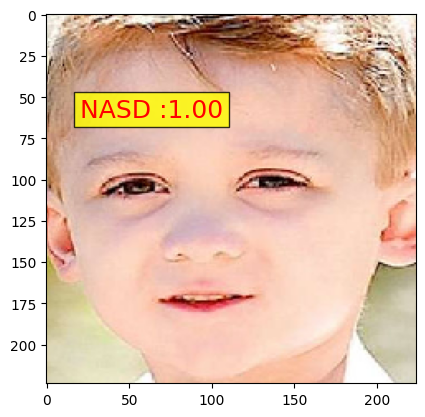

In [ ]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('/content/dataset/test/Non_Autistic/tna.005.jpg', target_size=(224, 224))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='NASD :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='yellow',alpha=0.8))
else:
    value ='ASD :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,horizontalalignment='right',
        verticalalignment='bottom',bbox=dict(facecolor='yellow',alpha=0.8))

plt.imshow(img1)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


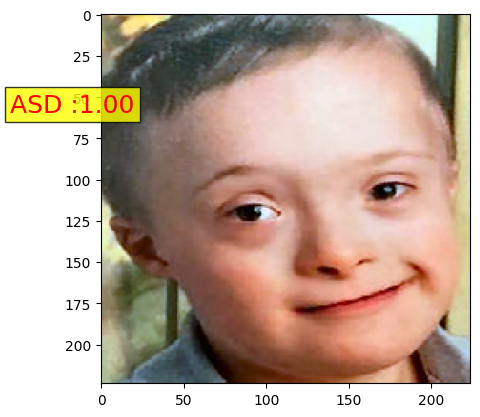

In [ ]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('/content/dataset/test/Autistic/ta.014.jpg', target_size=(224, 224))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='NASD :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='yellow',alpha=0.8))
else:
    value ='ASD :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,horizontalalignment='right',
        verticalalignment='bottom',bbox=dict(facecolor='yellow',alpha=0.8))

plt.imshow(img1)
plt.show()

Found 280 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


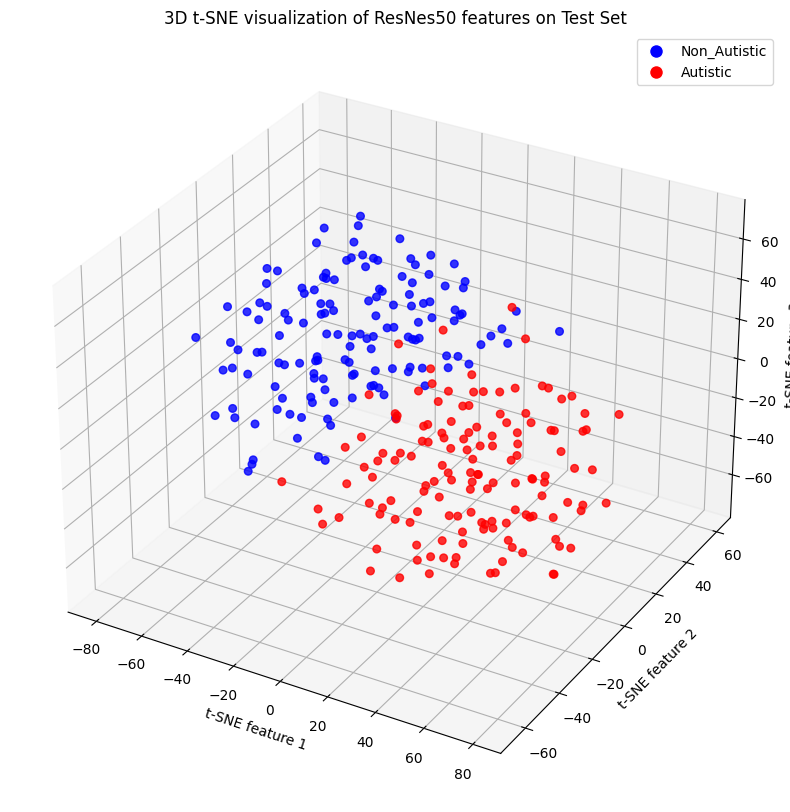

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.manifold import TSNE
import tensorflow as tf

# Load the saved model
model = load_model('/content/resnet50.h5')

# Remove the last layer (classification layer) to get features
feature_extractor = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)

# Prepare your test dataset
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32
img_size = (224, 224)  # Xception input size

test_set = datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Extract features
features = []
labels = []
for i in range(len(test_set)):
    x, y = test_set[i]
    feature = feature_extractor.predict(x)
    features.append(feature)
    labels.append(y)

features = np.concatenate(features)
labels = np.concatenate(labels)

# Apply t-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(features)

# Visualize the results in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Color map: blue for non-autistic (0), red for autistic (1)
colors = ['blue' if label == 0 else 'red' for label in labels]

scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], tsne_results[:, 2], c=colors, s=30, alpha=0.8)

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Non_Autistic',
                              markerfacecolor='blue', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Autistic',
                              markerfacecolor='red', markersize=10)]
ax.legend(handles=legend_elements)

ax.set_title('3D t-SNE visualization of ResNes50 features on Test Set')
ax.set_xlabel('t-SNE feature 1')
ax.set_ylabel('t-SNE feature 2')
ax.set_zlabel('t-SNE feature 3')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

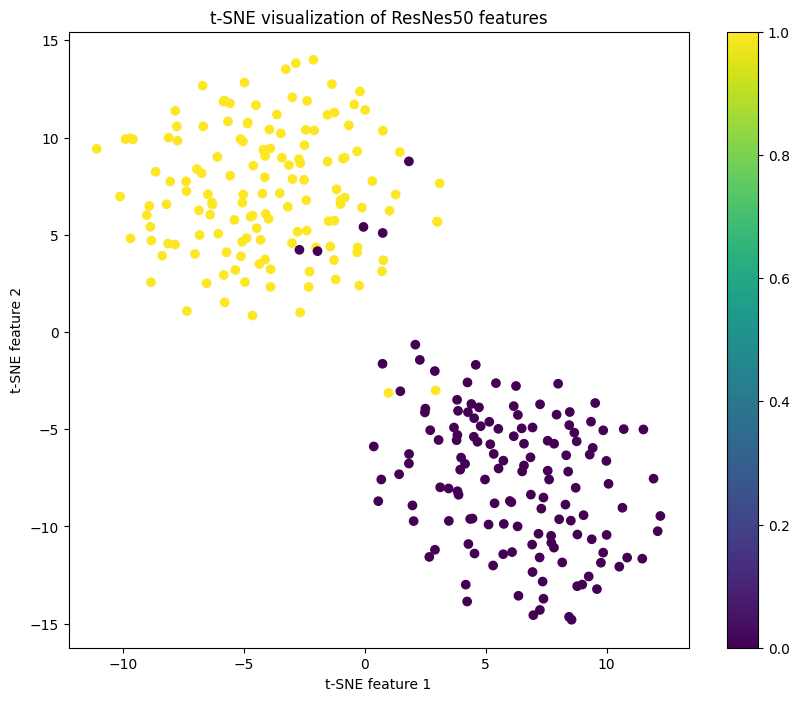

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.manifold import TSNE
import os

# Load the saved model
model = load_model('/content/resnet50.h5')

# Remove the last layer (classification layer) to get features
feature_extractor = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)

def process_data_tsne(data_dir):
    """
    Process images for t-SNE visualization.

    Parameters:
    data_dir: Directory containing the images

    Returns:
    Numpy array of image features and labels
    """
    features = []
    labels = []

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        label = 0 if class_name == 'Non_Autistic' else 1

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=(224, 224))
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.  # Normalize the image

            feature = feature_extractor.predict(img_array)
            features.append(feature.flatten())
            labels.append(label)

    return np.array(features), np.array(labels)

# Process the image data and get the features and labels
data_dir = '/content/dataset/test'
features, labels = process_data_tsne(data_dir)

# Perform t-SNE on features
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Visualize the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE visualization of ResNes50 features')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.manifold import TSNE
import os
from PIL import Image, ImageDraw
import tensorflow as tf
import matplotlib.patches as mpatches

# Load the saved model
model = load_model('/content/resnet50.h5')

# Remove the last layer (classification layer) to get features
feature_extractor = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)

def process_data_tsne(data_dir):
    features = []
    image_paths = []
    labels = []

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        label = 0 if class_name == 'Non_Autistic' else 1

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=(224, 224))
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.  # Normalize the image

            feature = feature_extractor.predict(img_array)
            features.append(feature.flatten())
            image_paths.append(img_path)
            labels.append(label)

    return np.array(features), image_paths, np.array(labels)

def visualise_tsne_images(tsne_data, image_paths, labels):
    tx = tsne_data[:, 0]
    ty = tsne_data[:, 1]

    tx = (tx - np.min(tx)) / (np.max(tx) - np.min(tx))
    ty = (ty - np.min(ty)) / (np.max(ty) - np.min(ty))

    width = 4000
    height = 3000
    max_dim = 200

    full_image = Image.new('RGBA', (width, height))
    for img_path, x, y, label in zip(image_paths, tx, ty, labels):
        tile = Image.open(img_path)
        rs = max(1, tile.width / max_dim, tile.height / max_dim)
        tile = tile.resize((int(tile.width / rs), int(tile.height / rs)), Image.ANTIALIAS)
        tile_width, tile_height = tile.size
        draw = ImageDraw.Draw(tile)
        draw.rectangle((0, 0, tile_width - 1, tile_height - 1), outline='blue' if label == 0 else 'red', width=8)
        full_image.paste(tile, (int((width - max_dim) * x), int((height - max_dim) * (1 - y))), mask=tile.convert('RGBA'))

    plt.figure(figsize=(30, 28))
    plt.imshow(full_image)
    plt.axis('off')

    # Create legend
    blue_patch = mpatches.Patch(color='blue', label='Non-Autistic')
    red_patch = mpatches.Patch(color='red', label='Autistic')
    plt.legend(handles=[blue_patch, red_patch], loc='upper right', fontsize=30, bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

# Process the image data and get the features and labels
data_dir = '/content/dataset/test'
features, image_paths, labels = process_data_tsne(data_dir)

# Perform t-SNE on features
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Visualise class images in 2-dimensional space
visualise_tsne_images(tsne_results, image_paths, labels)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import matplotlib.patches as mpatches

def visualise_tsne_images(tsne_data, image_paths, labels):
    tx = tsne_data[:, 0]
    ty = tsne_data[:, 1]

    tx = (tx - np.min(tx)) / (np.max(tx) - np.min(tx))
    ty = (ty - np.min(ty)) / (np.max(ty) - np.min(ty))

    width = 4000
    height = 3000
    max_dim = 200

    full_image = Image.new('RGBA', (width, height))
    for img_path, x, y, label in zip(image_paths, tx, ty, labels):
        tile = Image.open(img_path)
        rs = max(1, tile.width / max_dim, tile.height / max_dim)
        tile = tile.resize((int(tile.width / rs), int(tile.height / rs)), Image.ANTIALIAS)
        tile_width, tile_height = tile.size
        draw = ImageDraw.Draw(tile)
        draw.rectangle((0, 0, tile_width - 1, tile_height - 1), outline='blue' if label == 0 else 'red', width=8)
        full_image.paste(tile, (int((width - max_dim) * x), int((height - max_dim) * (1 - y))), mask=tile.convert('RGBA'))

    plt.figure(figsize=(30, 28))
    plt.imshow(full_image)
    plt.axis('off')

    # Create legend
    blue_patch = mpatches.Patch(color='blue', label='Non-Autistic')
    red_patch = mpatches.Patch(color='red', label='Autistic')
    plt.legend(handles=[blue_patch, red_patch], loc='upper right', fontsize=20, bbox_to_anchor=(1, 1))

   # Process the image data and get the features and labels
  data_dir = '/content/dataset/test'
  features, image_paths, labels = process_data_tsne(data_dir)

  # Perform t-SNE on features
  tsne = TSNE(n_components=2, random_state=42)
  tsne_results = tsne.fit_transform(features)

  # Visualise class images in 2-dimensional space
  visualise_tsne_images(tsne_results, image_paths, labels)

Precision, Recall, F1 score



Prediction of an Image of Test Set



Confusion Matrix of Test Set



In [ ]:

import pandas as pd
test_set.reset
ytesthat = model.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

<ipython-input-25-83125e26fe9f>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytesthat = model.predict_generator(test_set)


In [ ]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [ ]:

misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 280 Testing images : %d'%misclassified['y'].count())


Total misclassified image from 280 Testing images : 8


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df has the correct columns: 'y' for true labels and 'y_pred' for predicted labels
# If not, you might need to create them:
# df['y_pred'] = (df['predict'] > 0.5).astype(int)

# Create the confusion matrix
conf_matrix = confusion_matrix(df.y, df.y_pred)

# Define the labels
labels = ['Non-Autistic', 'Autistic']

# Create a prettier confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Improve the appearance
plt.tight_layout()

# Show the plot
plt.show()

# Print classification report
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(df.y, df.y_pred, target_names=labels))

# Calculate and print additional metrics
accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / conf_matrix.sum()
sensitivity = conf_matrix[1,1] / (conf_matrix[1,0] + conf_matrix[1,1])
specificity = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")

AttributeError: 'DataFrame' object has no attribute 'y'

Confusion Matrix of Train Set



In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

#Training Set
train_set = train_datagen.flow_from_directory('/content/dataset/train_ASD_DATA/train',
                                             target_size=(224,224),
                                             batch_size=10,
                                             shuffle=False,
                                             class_mode='binary')

Found 2526 images belonging to 2 classes.


In [ ]:

import pandas as pd
train_set.reset
ytrainhat = model.predict_generator(train_set)
df = pd.DataFrame({
    'filename':train_set.filenames,
    'predict':ytrainhat[:,0],
    'y':train_set.classes
})


<ipython-input-30-86d4ed593533>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytrainhat = model.predict_generator(train_set)


In [ ]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [ ]:

misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 2526 Training images : %d'%misclassified['y'].count())

Total misclassified image from 2526 Training images : 1


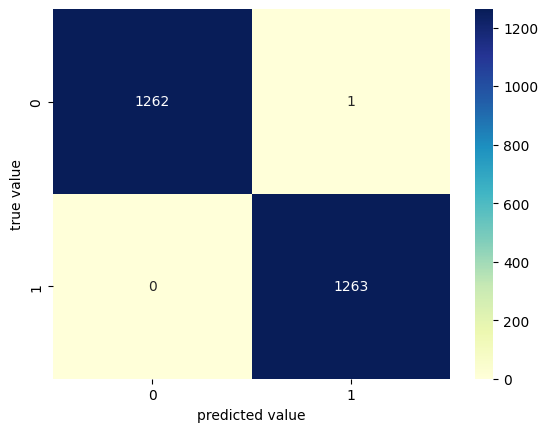

In [ ]:

#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

Confusion Matrix of Validation Set



In [ ]:
import pandas as pd
valid_set.reset
yvalidhat = model.predict_generator(valid_set)
df = pd.DataFrame({
    'filename':valid_set.filenames,
    'predict':yvalidhat[:,0],
    'y':valid_set.classes
})

<ipython-input-34-853db96b44e2>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  yvalidhat = model.predict_generator(valid_set)


In [ ]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [ ]:

misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 80 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 80 Validation images : 4


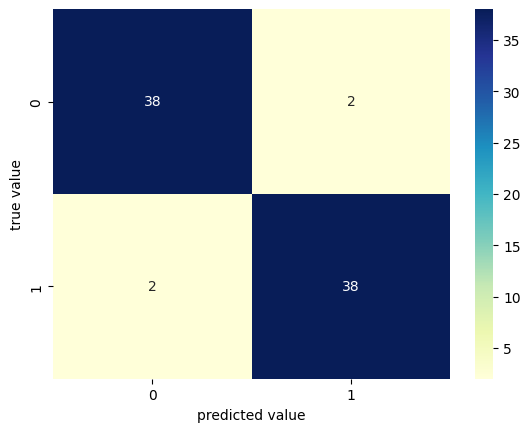

In [ ]:

#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');